In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_histogram_with_top_labels(df, value_column, label_column='gene_pair', title=None, bins=30, color='mediumseagreen'):
    """
    Plot a histogram of a numeric column from a single DataFrame and annotate the top two x-axis values
    with their corresponding labels from a second column.

    Parameters:
    - df: pandas DataFrame with at least [value_column, label_column]
    - value_column: str, name of numeric column to histogram
    - label_column: str, column containing labels for annotation (e.g., 'gene_pair')
    - title: str, title for the plot
    - bins: int, number of histogram bins
    - color: str, color of the histogram
    """
    plt.figure(figsize=(16, 6))

    # Plot the histogram
    sns.histplot(df[value_column], bins=bins, kde=False, color=color, alpha=0.7)

    # Find top 2 max x-axis values
    top_indices = df[value_column].nlargest(2).index
    for i, idx in enumerate(top_indices):
        x = df.loc[idx, value_column]
        label = df.loc[idx, label_column]
        plt.annotate(
            label,
            xy=(x, 0),
            xytext=(x, 5 + i),  # stack labels slightly
            arrowprops=dict(arrowstyle='->', lw=1),
            ha='center',
            fontsize=15,
            color='black'
        )

    # Final plot formatting
    plt.xlabel(value_column, fontsize=20)
    plt.ylabel('Count', fontsize=20)
    plt.tick_params(labelsize=15)

    plt.title(title or f'Histogram of ipTM Scores for Gene Pairs Identified by Walktrap Clustering', fontsize=20)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.savefig("walktrap_histogram.png", dpi=300)
    plt.show()


In [11]:
#####
# FROM TOP 182 PAIR SUBSET
#####

import pandas as pd
df = pd.read_csv('~/gene_embedding_analysis/afm_cil_182_iptm_values.csv')

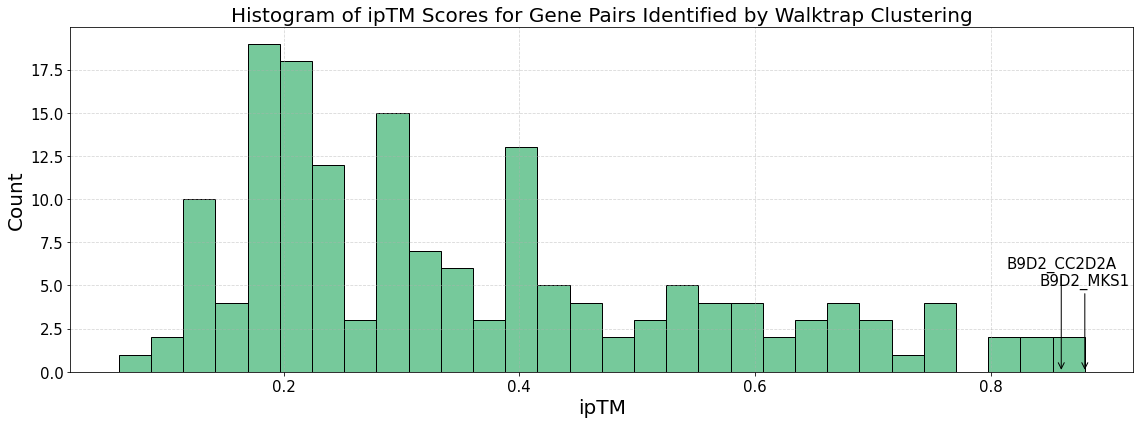

In [12]:
plot_histogram_with_top_labels(df, 'ipTM', label_column='Gene_Pair', title=None, bins=30, color='mediumseagreen')

In [13]:
df = pd.read_csv('~/top100_ciliary_predictions_sorted.csv')

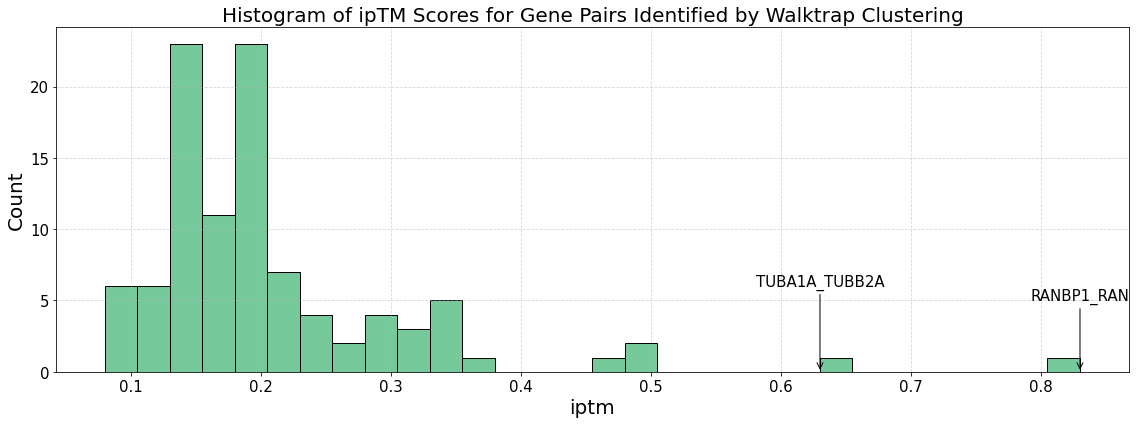

In [14]:
plot_histogram_with_top_labels(df, 'iptm', label_column='gene_pair', title=None, bins=30, color='mediumseagreen')

In [38]:
def plot_histogram_with_top_labels(df, value_column, label_column='gene_pair', title=None, bins=30, color='mediumseagreen', xlim=None, ylim=None):
    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.figure(figsize=(16, 6))

    # Plot the histogram
    sns.histplot(df[value_column], bins=bins, kde=False, color=color, alpha=0.7)

    # Find top 2 max x-axis values
    top_indices = df[value_column].nlargest(2).index
    for i, idx in enumerate(top_indices):
        x = df.loc[idx, value_column]
        label = df.loc[idx, label_column]
        plt.annotate(
            label,
            xy=(x, 0),
            xytext=(x, 5 + 1.5 * i),  # stack labels
            arrowprops=dict(arrowstyle='->', lw=1),
            ha='right',
            fontsize=12,
            color='black'
        )

    # Axis limits
    if xlim:
        plt.xlim(xlim)
    if ylim:
        plt.ylim(ylim)

    # Final plot formatting
    plt.xlabel(value_column, fontsize=20)
    plt.ylabel('Count', fontsize=20)
    plt.tick_params(labelsize=15)
    plt.title(title or f'Histogram of {value_column} Scores for Gene Pairs Identified by Walktrap Clustering', fontsize=18)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


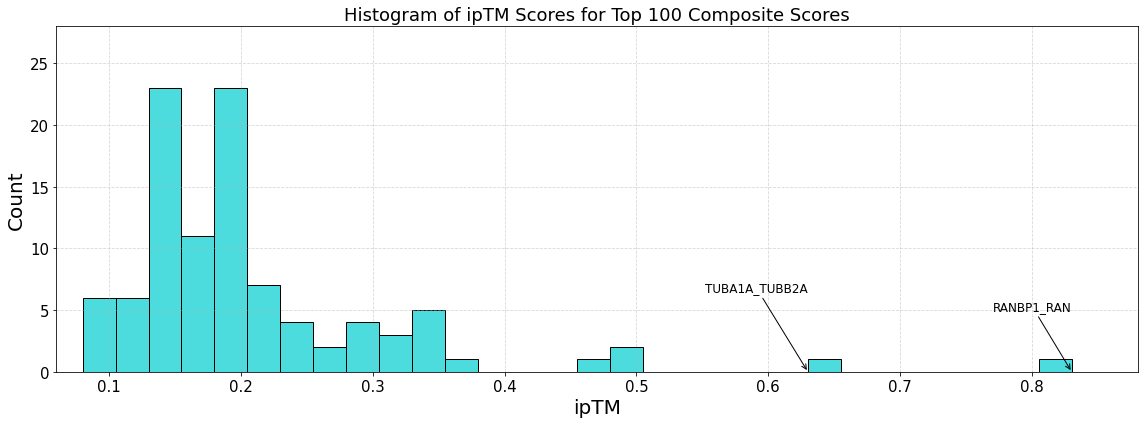

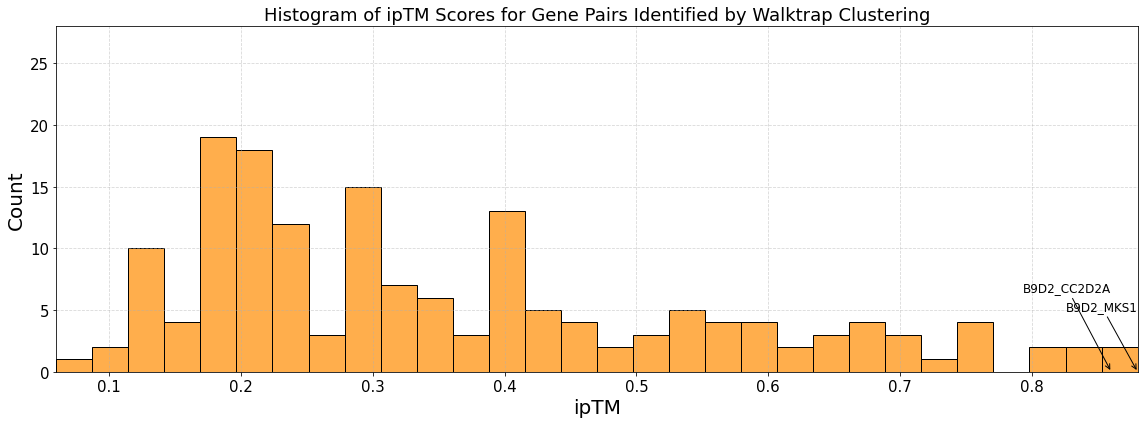

In [51]:
import numpy as np

# Load both datasets
df1 = pd.read_csv('~/gene_embedding_analysis/afm_cil_182_iptm_values.csv')
df2 = pd.read_csv('~/top100_ciliary_predictions_sorted.csv')
df2.rename(columns={'iptm':'ipTM'},inplace=True)
# Combine values to determine global limits
all_values = pd.concat([df1['ipTM'], df2['ipTM']], ignore_index=True)

# Determine global axis limits
xlim = (all_values.min(), all_values.max())

# Determine max histogram count for consistent y-axis
hist1_counts, _ = np.histogram(df1['ipTM'], bins=30)
hist2_counts, _ = np.histogram(df2['ipTM'], bins=30)
ylim = (0, max(hist1_counts.max(), hist2_counts.max()) + 5)  # add padding

# Plot both

plot_histogram_with_top_labels(df2, 'ipTM', label_column='gene_pair', title = 'Histogram of ipTM Scores for Top 100 Composite Scores', bins=30, color='darkturquoise', xlim=xlim, ylim=ylim)
plot_histogram_with_top_labels(df1, 'ipTM', label_column='Gene_Pair', title=None, bins=30, color='darkorange', xlim=xlim, ylim=ylim)

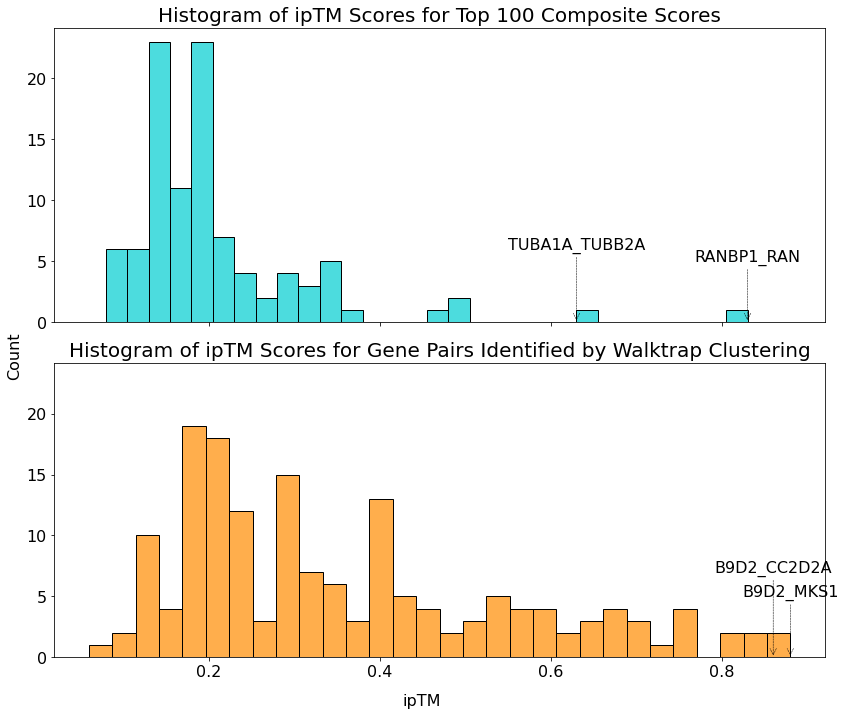

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load both datasets
df1 = pd.read_csv('~/gene_embedding_analysis/afm_cil_182_iptm_values.csv')
df2 = pd.read_csv('~/top100_ciliary_predictions_sorted.csv')

# Global limits for shared x and y axes
all_values = pd.concat([df1['ipTM'], df2['iptm']], ignore_index=True)
xlim = (all_values.min(), all_values.max())
hist1_counts, _ = np.histogram(df1['ipTM'], bins=30)
hist2_counts, _ = np.histogram(df2['iptm'], bins=30)
ylim = (0, max(hist1_counts.max(), hist2_counts.max()) + 5)

# Create figure with subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True, sharey=True)

# Top plot
sns.histplot(df2['iptm'], bins=30, kde=False, color='darkturquoise', alpha=0.7, ax=axes[0])
axes[0].set_title('Histogram of ipTM Scores for Top 100 Composite Scores', fontsize=20)
axes[0].set_ylabel('')  # REMOVE individual y-axis label
axes[0].tick_params(axis='both', labelsize=16) 
top_indices_1 = df2['iptm'].nlargest(2).index
for i, idx in enumerate(top_indices_1):
    x = df2.loc[idx, 'iptm']
    label = df2.loc[idx, 'gene_pair']
    axes[0].annotate(label, xy=(x, 0), xytext=(x, 5 + i),
                     arrowprops=dict(arrowstyle='->', linestyle='--', linewidth=0.5), ha='center', fontsize=16)

# Bottom plot
sns.histplot(df1['ipTM'], bins=30, kde=False, color='darkorange', alpha=0.7, ax=axes[1])
axes[1].set_title('Histogram of ipTM Scores for Gene Pairs Identified by Walktrap Clustering', fontsize=20)
axes[1].set_ylabel('') # Remove y axis
axes[1].set_xlabel('') # Remove x axis
axes[1].tick_params(axis='both', labelsize=16) 
top_indices_2 = df1['ipTM'].nlargest(2).index
for i, idx in enumerate(top_indices_2):
    x = df1.loc[idx, 'ipTM']
    label = df1.loc[idx, 'Gene_Pair']
    axes[1].annotate(label, xy=(x, 0), xytext=(x, 5 + 2*i),
                     arrowprops=dict(arrowstyle='->', linestyle='--', linewidth=0.5), ha='center', fontsize=16)

# Shared axis labels
fig.supxlabel('ipTM', fontsize=16)
fig.supylabel('Count', fontsize=16)
# Adjust layout
plt.tight_layout()
plt.savefig('Figure5.png', dpi=300)
plt.show()
